<a href="https://colab.research.google.com/github/edwin19987/CS_HW/blob/master/transfer_learning_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(60000,28,28,1)/255
x_test = x_test.reshape(10000,28,28,1)/255

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

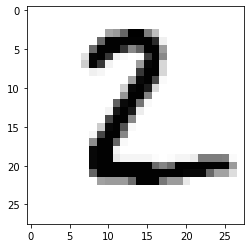

In [0]:
X=x_test[1].reshape(28,28)
plt.imshow(X, cmap='Greys')

In [0]:
CNN_layers = [Conv2D(16,(3,3),padding = 'same',input_shape=(28,28,1),activation='relu'),
             MaxPooling2D(pool_size=(2,2)),
             Conv2D(32,(3,3),padding='same',activation='relu'),
             MaxPooling2D(pool_size=(2,2)),
             Conv2D(64,(3,3),padding='same',activation='relu'),
             GlobalAveragePooling2D()]
FNN_layers = [Flatten(),
             Dense(54,activation='relu'),
             Dense(10, activation='softmax')]

In [0]:
model = Sequential(CNN_layers+FNN_layers)

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0087),metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=12)

Epoch 1/12
469/469 [==============================] - 38s 80ms/step - loss: 2.3018 - accuracy: 0.1118
Epoch 2/12
469/469 [==============================] - 38s 80ms/step - loss: 2.3019 - accuracy: 0.1105
Epoch 3/12
469/469 [==============================] - 38s 80ms/step - loss: 2.3018 - accuracy: 0.1120
Epoch 4/12
469/469 [==============================] - 38s 80ms/step - loss: 2.3018 - accuracy: 0.1114
Epoch 5/12
469/469 [==============================] - 38s 80ms/step - loss: 2.3018 - accuracy: 0.1124
Epoch 6/12
469/469 [==============================] - 38s 80ms/step - loss: 2.3018 - accuracy: 0.1112
Epoch 7/12
469/469 [==============================] - 38s 81ms/step - loss: 2.3018 - accuracy: 0.1118
Epoch 8/12
469/469 [==============================] - 38s 80ms/step - loss: 2.3019 - accuracy: 0.1118
Epoch 9/12
469/469 [==============================] - 38s 81ms/step - loss: 2.3018 - accuracy: 0.1120
Epoch 10/12
469/469 [==============================] - 38s 81ms/step - loss: 2.301

In [0]:
# 使用fashion_mnist來做transfer learning

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(f_train, m_train), (f_test, m_test) = fashion_mnist.load_data()

In [0]:
f_train = f_train.reshape(60000, 28, 28, 1) / 255
f_test = f_test.reshape(10000, 28, 28, 1) / 255

In [0]:
m_train = to_categorical(m_train, 10)
m_test = to_categorical(m_test, 10)

In [0]:
#屬於fashion_mnist的CNN

In [0]:
from tensorflow.keras.layers import MaxPool2D

In [0]:
CNN_layers_2= [Conv2D(16, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'),
              MaxPool2D(),
              Conv2D(32, (3, 3), padding='same', activation='relu'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu'),
              GlobalAveragePooling2D()]

In [0]:
model_2 = Sequential(CNN_layers_2+FNN_layers)

In [0]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
global_average_pooling2d_3 ( (None, 64)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [0]:
for layer in FNN_layers:
    layer.trainable = False

In [0]:
model_2.compile(
    loss='categorical_crossentropy', 
    optimizer=Adam(), 
    metrics=['accuracy'])

In [0]:
model_2.fit(f_train, m_train, batch_size=150, epochs=10)

Epoch 1/10
400/400 [==============================] - 39s 97ms/step - loss: 1.8725 - accuracy: 0.3743
Epoch 2/10
400/400 [==============================] - 39s 96ms/step - loss: 1.5191 - accuracy: 0.4900
Epoch 3/10
400/400 [==============================] - 39s 96ms/step - loss: 1.4059 - accuracy: 0.5213
Epoch 4/10
400/400 [==============================] - 39s 96ms/step - loss: 1.3502 - accuracy: 0.5366
Epoch 5/10
400/400 [==============================] - 39s 97ms/step - loss: 1.3077 - accuracy: 0.5478
Epoch 6/10
400/400 [==============================] - 38s 96ms/step - loss: 1.2699 - accuracy: 0.5634
Epoch 7/10
400/400 [==============================] - 38s 96ms/step - loss: 1.2434 - accuracy: 0.5708
Epoch 8/10
400/400 [==============================] - 39s 96ms/step - loss: 1.2122 - accuracy: 0.5828
Epoch 9/10
400/400 [==============================] - 39s 96ms/step - loss: 1.1918 - accuracy: 0.5921
Epoch 10/10
400/400 [==============================] - 38s 96ms/step - loss: 1.179

In [0]:
model_2.evaluate(f_train,m_train)

1875/1875 [==============================] - 18s 9ms/step - loss: 1.1769 - accuracy: 0.5920


[1.1768752336502075, 0.5920000076293945]

In [0]:
model_2.evaluate(f_test,m_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.2058 - accuracy: 0.5852


[1.2058491706848145, 0.5852000117301941]

In [0]:
model.evaluate(x_train,y_train)
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 2.3018 - accuracy: 0.1135


[2.301806688308716, 0.11349999904632568]